In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


Need additional librairies : 
* geopandas : https://geopandas.org/install.html
* descartes : https://docs.descarteslabs.com/installation.html

The following was heavily inspired from this tutorial : https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [30]:
# set the filepath and load in a shapefile
fp = "data\London-wards-2014\London-wards-2014_ESRI"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


<AxesSubplot:>

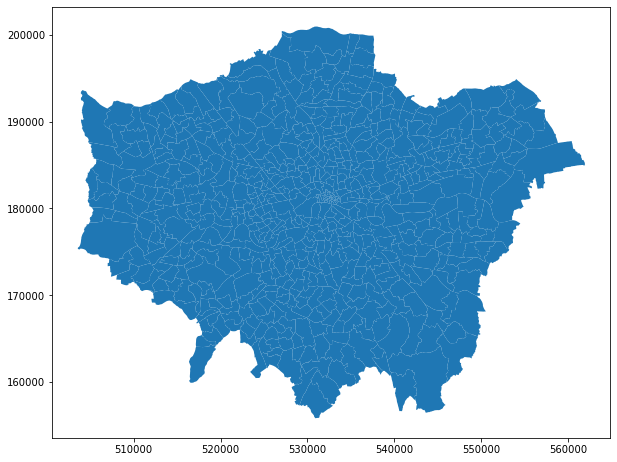

In [7]:
map_df.plot(figsize=(10,10))

In [10]:
# let's import the data:

final = pd.read_csv('final.csv')
final

,area_id,Names,Index
0,E05000026,Abbey,5.646191
1,E05000027,Alibon,12.938904
2,E05000028,Becontree,10.409670
3,E05000029,Chadwell Heath,11.208913
4,E05000030,Eastbrook,3.155647
...,...,...,...
477,E05000644,St. James's,9.824713
478,E05000645,Tachbrook,12.374724
479,E05000646,Vincent Square,5.603661
480,E05000647,Warwick,5.821616


In [25]:
# Let's merge the two datasets
merged = map_df.set_index('GSS_CODE').join(final.set_index('area_id'))
merged

,NAME,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,Names,Index
GSS_CODE,,,,,,,,,
E05000405,Chessington South,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...",Chessington South,6.656323
E05000414,Tolworth and Hook Rise,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...",Tolworth and Hook Rise,6.518816
E05000401,Berrylands,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...",Berrylands,6.693417
E05000400,Alexandra,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",Alexandra,6.733289
E05000402,Beverley,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16...",Beverley,9.121317
...,...,...,...,...,...,...,...,...,...
E05009289,Aldgate,11.230,0.0,E09000001,City of London,51182,"POLYGON ((533315.600 180988.800, 533305.700 18...",NaN,NaN
E05009295,Broad Street,8.157,0.0,E09000001,City of London,50669,"POLYGON ((533005.700 181612.200, 533099.100 18...",NaN,NaN
E05009299,Coleman Street,15.061,0.0,E09000001,City of London,122520,"POLYGON ((532552.800 181289.400, 532554.200 18...",NaN,NaN


<AxesSubplot:>

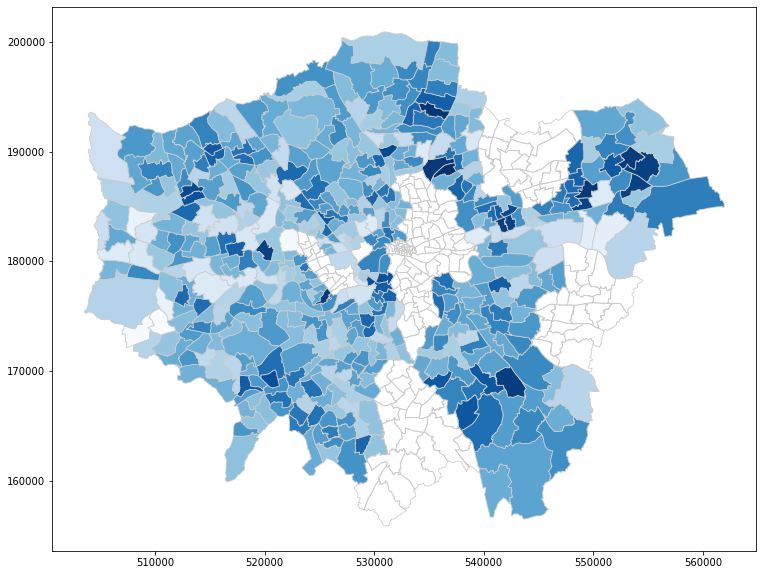

In [26]:
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column='Index', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
